In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the title tsv file
df1=pd.read_csv("data.tsv",sep='\t')
df1.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
# Checking a random TV Show present in the dataset
df1[df1['primaryTitle']=='Band of Brothers']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
179379,tt0185906,tvMiniSeries,Band of Brothers,Band of Brothers,0,2001,2001,594,"Action,Drama,History"
502382,tt0522121,tvEpisode,Band of Brothers,Band of Brothers,0,1961,\N,\N,Drama
580542,tt0601342,tvEpisode,Band of Brothers,Band of Brothers,0,1993,\N,49,"Action,Adventure,Fantasy"
2604708,tt1339922,tvEpisode,Band of Brothers,Band of Brothers,0,2008,\N,\N,Reality-TV
2988075,tt1737376,tvEpisode,Band of Brothers,Band of Brothers,0,2010,\N,21,"Comedy,Family,Music"
3683496,tt2591986,tvEpisode,Band of Brothers,Band of Brothers,0,2013,\N,43,"Drama,Reality-TV"
4134760,tt3653954,tvEpisode,Band of Brothers,Band of Brothers,0,2014,\N,\N,Reality-TV
4830578,tt5217254,tvSeries,Band of Brothers,Band of Brothers,0,2008,\N,30,"Comedy,Music,Reality-TV"
5103374,tt5828518,tvEpisode,Band of Brothers,Band of Brothers,0,2002,\N,\N,"Music,Reality-TV"
5233624,tt6119370,tvEpisode,Band of Brothers,Band of Brothers,0,2016,\N,42,"Documentary,War"


In [4]:
df1['titleType'].value_counts()

tvEpisode       5014966
short            751321
movie            556266
video            272874
tvSeries         188611
tvMovie          122626
tvMiniSeries      32406
tvSpecial         29140
videoGame         26007
tvShort           13029
Name: titleType, dtype: int64

In [5]:
#Obtaining only columns which are useful features for films and tv shows
df1=df1[['tconst','titleType','originalTitle','startYear','endYear','runtimeMinutes','genres']]
df1.head()
#Dropping all other content other than tvseries,tvMiniseries and movies
li=['tvEpisode','short','video','videoGame','tvMovie','tvSpecial','tvShort']
for i in range(0,len(li)):
    df1.drop(df1[df1['titleType']==li[i]].index,inplace=True)
df1

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,1894,\N,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,\N,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,1900,\N,\N,"Biography,Drama"
499,tt0000502,movie,Bohemios,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,1906,\N,70,"Biography,Crime,Drama"
...,...,...,...,...,...,...,...
7007161,tt9916678,tvSeries,Acelerados,2019,\N,\N,Comedy
7007162,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,2007,\N,100,Documentary
7007174,tt9916706,movie,Dankyavar Danka,2013,\N,\N,Comedy
7007185,tt9916730,movie,6 Gunn,2017,\N,116,\N


In [6]:
#Replacing \N value with NaN in the dataset
df1.replace(r'\N','NaN',inplace=True)

In [7]:
df1.replace('NaN',np.nan,inplace=True)

In [8]:
df1.isnull().sum()

tconst                 0
titleType              0
originalTitle          0
startYear          78017
endYear           713952
runtimeMinutes    332710
genres             90068
dtype: int64

In [9]:
#Extracting movies from df1 and storing them in movie dataset
movie_list=['movie']
movie=df1[df1['titleType'].isin(movie_list)]
movie

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,1894,NaN,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,NaN,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,1900,NaN,NaN,"Biography,Drama"
499,tt0000502,movie,Bohemios,1905,NaN,100,NaN
571,tt0000574,movie,The Story of the Kelly Gang,1906,NaN,70,"Biography,Crime,Drama"
...,...,...,...,...,...,...,...
7007135,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,57,Documentary
7007162,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,2007,NaN,100,Documentary
7007174,tt9916706,movie,Dankyavar Danka,2013,NaN,NaN,Comedy
7007185,tt9916730,movie,6 Gunn,2017,NaN,116,NaN


In [10]:
#Extracting the TV Shows from df1 and storing them in tv dataset
tv_list=['tvSeries','tvMiniSeries']
tv=df1[df1['titleType'].isin(tv_list)]
tv

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres
34987,tt0035599,tvSeries,Voice of Firestone Televues,1943,1947,15,NaN
35188,tt0035803,tvSeries,Die Deutsche Wochenschau,1940,1945,12,"Documentary,News"
37617,tt0038276,tvSeries,You Are an Artist,1946,1950,15,NaN
38451,tt0039120,tvSeries,Americana,1947,1949,30,"Family,Game-Show"
38452,tt0039121,tvSeries,Birthday Party,1947,1949,30,Family
...,...,...,...,...,...,...,...
7006934,tt9916210,tvSeries,Rumpole of the Bailey,NaN,NaN,NaN,NaN
7006937,tt9916216,tvSeries,Kalyanam Mudhal Kadhal Varai,2014,2017,22,Romance
7006938,tt9916218,tvSeries,Lost in Food,2016,2017,NaN,Talk-Show
7007018,tt9916380,tvSeries,Meie aasta Aafrikas,2019,NaN,43,"Adventure,Comedy,Family"


In [11]:
tv[tv['originalTitle']=='Americana']

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres
38451,tt0039120,tvSeries,Americana,1947,1949,30,"Family,Game-Show"
380283,tt0396284,tvMiniSeries,Americana,1992,NaN,NaN,Documentary
1085143,tt10203996,tvSeries,Americana,2019,NaN,NaN,"Drama,Thriller"
6436292,tt8712634,tvSeries,Americana,NaN,NaN,NaN,"Comedy,Drama"


In [12]:
tv.info(),movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221017 entries, 34987 to 7007161
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          221017 non-null  object
 1   titleType       221017 non-null  object
 2   originalTitle   221017 non-null  object
 3   startYear       208042 non-null  object
 4   endYear         63331 non-null   object
 5   runtimeMinutes  91584 non-null   object
 6   genres          201230 non-null  object
dtypes: object(7)
memory usage: 13.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 556266 entries, 8 to 7007196
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          556266 non-null  object
 1   titleType       556266 non-null  object
 2   originalTitle   556266 non-null  object
 3   startYear       491224 non-null  object
 4   endYear         0 non-null       object
 5   runtimeM

(None, None)

In [13]:
movie.isnull().sum()

tconst                 0
titleType              0
originalTitle          0
startYear          65042
endYear           556266
runtimeMinutes    203277
genres             70281
dtype: int64

In [14]:
#Dropping all NaN values from startyear and genres column in movie dataset
movie.dropna(subset=['startYear','genres'],inplace=True)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
tv.isnull().sum()

tconst                 0
titleType              0
originalTitle          0
startYear          12975
endYear           157686
runtimeMinutes    129433
genres             19787
dtype: int64

In [16]:
#Similarily dropping all the values from tv dataset in the startyear and genres columns having NaN values
tv.dropna(subset=['startYear','genres'],inplace=True)
tv.isnull().sum()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


tconst                 0
titleType              0
originalTitle          0
startYear              0
endYear           130298
runtimeMinutes    103853
genres                 0
dtype: int64

In [17]:
tv[tv['originalTitle']=='Americana']

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres
38451,tt0039120,tvSeries,Americana,1947,1949,30,"Family,Game-Show"
380283,tt0396284,tvMiniSeries,Americana,1992,NaN,NaN,Documentary
1085143,tt10203996,tvSeries,Americana,2019,NaN,NaN,"Drama,Thriller"


In [18]:
#reading crew dataset containin writers and directors and writers
df2=pd.read_csv("data.tsv",sep='\t')
df2.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [19]:
#Replacing all \N values with NaN values and obtaining only the tconst and directors column
df2.replace(r'\N','NaN',inplace=True)
df2.replace('NaN',np.nan,inplace=True)
df2=df2[['tconst','directors']]
df2

,tconst,directors
0,tt0000001,nm0005690
1,tt0000002,nm0721526
2,tt0000003,nm0721526
3,tt0000004,nm0721526
4,tt0000005,nm0005690
...,...,...
7007241,tt9916848,"nm5519454,nm5519375"
7007242,tt9916850,"nm5519375,nm5519454"
7007243,tt9916852,"nm5519375,nm5519454"
7007244,tt9916856,nm10538645


In [20]:
#Dropping all the NaN values
df2.replace(r'\N','NaN',inplace=True)
df2.replace('NaN',np.nan,inplace=True)
df2.isnull().sum()
df2.dropna(inplace=True)

In [21]:
df2.isnull().sum()

tconst       0
directors    0
dtype: int64

In [22]:
df2[df2['tconst']=='tt0039120']

,tconst,directors
38451,tt0039120,"nm0590202,nm0168641,nm11657766"


In [23]:
#reading dataset which contain information of the crew of the shows and movies
df3=pd.read_csv("data.tsv",sep='\t')
df3.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [24]:
#Obtaining only the tconst,nconst and category columns since job and characters are irrelevant for the study
df3=df3[['tconst','nconst','category']]
df3

,tconst,nconst,category
0,tt0000001,nm1588970,self
1,tt0000001,nm0005690,director
2,tt0000001,nm0374658,cinematographer
3,tt0000002,nm0721526,director
4,tt0000002,nm1335271,composer
...,...,...,...
40301770,tt9916880,nm0996406,director
40301771,tt9916880,nm1482639,writer
40301772,tt9916880,nm2586970,writer
40301773,tt9916880,nm1594058,producer


In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40301775 entries, 0 to 40301774
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   tconst    object
 1   nconst    object
 2   category  object
dtypes: object(3)
memory usage: 922.4+ MB


In [26]:
df3['category'].value_counts()


actor                  9285953
actress                6951418
self                   6844053
writer                 5344083
director               4658497
producer               2462364
composer               1435854
cinematographer        1431235
editor                 1346442
production_designer     299960
archive_footage         239445
archive_sound             2471
Name: category, dtype: int64

In [27]:
#Retaining only the actors and actresses from this datasets since all other crew is not required(inlcuding director[obtained in df2])
category_list=['self','writer','producer','composer','cinematographer','editor','production_designer','archive_footage','archive_sound','director']
for i in range (0,len(category_list)):
    df3.drop(df3[df3['category']==category_list[i]].index,inplace=True)


In [28]:
df3['category'].value_counts()

actor      9285953
actress    6951418
Name: category, dtype: int64

In [29]:
df3[df3['tconst']=='tt0039120']

,tconst,nconst,category
313734,tt0039120,nm0113897,actor
313735,tt0039120,nm0274631,actress
313736,tt0039120,nm0240118,actor
313737,tt0039120,nm0416564,actor


In [30]:
#reading the dataset containing the rating of the movies and tv-shows
df4=pd.read_csv("data.tsv",sep='\t')
df4.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1636
1,tt0000002,6.1,198
2,tt0000003,6.5,1326
3,tt0000004,6.2,120
4,tt0000005,6.1,2107


In [31]:
#dropping NaN values
df4.replace(r'\N','NaN',inplace=True)
df4.replace('NaN',np.nan,inplace=True)
df4.isnull().sum()
df4.dropna(inplace=True)

In [32]:
#reading the dataset containg all the names of the crew members uniquely identified by nconst
df5=pd.read_csv("data.tsv",sep='\t')
df5.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0031983,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0117057,tt0038355,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0054452,tt0049189,tt0059956"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050986,tt0050976,tt0083922"


In [33]:
#Extracting only the nconst,primaryName,knownForTitles and primaryProfession neglecting the birth and death year as it is not required in the recommender
df5=df5[['nconst','primaryName','knownForTitles','primaryProfession']]
df5.head()

,nconst,primaryName,knownForTitles,primaryProfession
0,nm0000001,Fred Astaire,"tt0072308,tt0031983,tt0053137,tt0050419","soundtrack,actor,miscellaneous"
1,nm0000002,Lauren Bacall,"tt0037382,tt0117057,tt0038355,tt0071877","actress,soundtrack"
2,nm0000003,Brigitte Bardot,"tt0057345,tt0054452,tt0049189,tt0059956","actress,soundtrack,music_department"
3,nm0000004,John Belushi,"tt0072562,tt0077975,tt0080455,tt0078723","actor,soundtrack,writer"
4,nm0000005,Ingmar Bergman,"tt0060827,tt0050986,tt0050976,tt0083922","writer,director,actor"


In [34]:
#Dropping all the NaN values
df5.replace(r'\N','NaN',inplace=True)
df5.replace('NaN',np.nan,inplace=True)
df5.isnull().sum()

nconst                     0
primaryName                0
knownForTitles       1805310
primaryProfession    2105110
dtype: int64

In [35]:
df5.dropna(subset=['nconst','primaryName','knownForTitles'],inplace=True)

In [36]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8436695 entries, 0 to 10242002
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   knownForTitles     object
 3   primaryProfession  object
dtypes: object(4)
memory usage: 321.8+ MB


In [37]:
tv[tv['originalTitle']=='Americana']

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres
38451,tt0039120,tvSeries,Americana,1947,1949,30,"Family,Game-Show"
380283,tt0396284,tvMiniSeries,Americana,1992,NaN,NaN,Documentary
1085143,tt10203996,tvSeries,Americana,2019,NaN,NaN,"Drama,Thriller"


In [38]:
movie

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,1894,NaN,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,NaN,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,1900,NaN,NaN,"Biography,Drama"
571,tt0000574,movie,The Story of the Kelly Gang,1906,NaN,70,"Biography,Crime,Drama"
611,tt0000615,movie,Robbery Under Arms,1907,NaN,NaN,Drama
...,...,...,...,...,...,...,...
7007094,tt9916538,movie,Kuambil Lagi Hatiku,2019,NaN,123,Drama
7007135,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,57,Documentary
7007162,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,2007,NaN,100,Documentary
7007174,tt9916706,movie,Dankyavar Danka,2013,NaN,NaN,Comedy


In [39]:
movie[movie['originalTitle']=='Bird Box']

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres
3743954,tt2737304,movie,Bird Box,2018,NaN,124,"Drama,Horror,Sci-Fi"


In [40]:
#Merging the tv and df4(rating) dataset 
ratings_tv=pd.merge(tv,df4,on='tconst')
ratings_tv.head()

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0035803,tvSeries,Die Deutsche Wochenschau,1940,1945,12,"Documentary,News",7.8,31
1,tt0039120,tvSeries,Americana,1947,1949,30,"Family,Game-Show",3.0,8
2,tt0039123,tvSeries,Kraft Television Theatre,1947,1958,60,Drama,8.5,128
3,tt0039125,tvSeries,Public Prosecutor,1947,1951,20,"Crime,Drama,Mystery",5.9,7
4,tt0040021,tvSeries,Actor's Studio,1948,1950,30,Drama,7.3,55


In [41]:
ratings_tv.isnull().sum()

tconst                0
titleType             0
originalTitle         0
startYear             0
endYear           52563
runtimeMinutes    32795
genres                0
averageRating         0
numVotes              0
dtype: int64

In [42]:
#merging the movie and df4(rating) dataset
ratings_movie=pd.merge(movie,df4,on='tconst')

In [43]:
ratings_movie.head()

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,1894,NaN,45,Romance,5.9,154
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,NaN,20,"Documentary,News,Sport",5.2,354
2,tt0000335,movie,Soldiers of the Cross,1900,NaN,NaN,"Biography,Drama",6.1,41
3,tt0000574,movie,The Story of the Kelly Gang,1906,NaN,70,"Biography,Crime,Drama",6.1,588
4,tt0000615,movie,Robbery Under Arms,1907,NaN,NaN,Drama,4.5,15


In [44]:
ratings_movie.info(),ratings_tv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240749 entries, 0 to 240748
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          240749 non-null  object 
 1   titleType       240749 non-null  object 
 2   originalTitle   240749 non-null  object 
 3   startYear       240749 non-null  object 
 4   endYear         0 non-null       object 
 5   runtimeMinutes  218207 non-null  object 
 6   genres          240749 non-null  object 
 7   averageRating   240749 non-null  float64
 8   numVotes        240749 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 18.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76758 entries, 0 to 76757
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          76758 non-null  object 
 1   titleType       76758 non-null  object 
 2   originalTitle   76758 non-nu

(None, None)

In [45]:
#Extracting all columns except the endYear in the rating_movie dataset since all are NaN values and movie only has release year
ratings_movie=ratings_movie[['tconst','titleType','originalTitle','startYear','runtimeMinutes','genres','averageRating','numVotes']]
ratings_movie.rename(columns={'startYear':'Year'},inplace=True)

In [46]:
ratings_movie.head()

,tconst,titleType,originalTitle,Year,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,1894,45,Romance,5.9,154
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",5.2,354
2,tt0000335,movie,Soldiers of the Cross,1900,NaN,"Biography,Drama",6.1,41
3,tt0000574,movie,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,588
4,tt0000615,movie,Robbery Under Arms,1907,NaN,Drama,4.5,15


Text(0.5, 1.0, 'Frequency v/s Rating for TV-Shows')

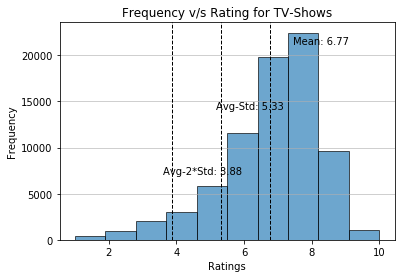

In [47]:
#In Order to determine good quality content to be recommended, the need for determining the rating occurs.
#Obtaining ratings which are greater than Mean ratings

avg=np.average(ratings_tv['averageRating'])
std=np.std(ratings_tv['averageRating'])
plt.hist(ratings_tv['averageRating'],alpha=0.65,edgecolor='k')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ratings')
min_ylim, max_ylim = plt.ylim()
plt.axvline(avg,color='k', linestyle='dashed', linewidth=1)
plt.text(avg*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(avg))

plt.axvline(avg-std,color='k', linestyle='dashed', linewidth=1)
plt.text(avg-std*1.1, max_ylim*0.6, 'Avg-Std: {:.2f}'.format(avg-std))


plt.axvline(avg-2*std,color='k', linestyle='dashed', linewidth=1)
plt.text(avg-2*std*1.1, max_ylim*0.3, 'Avg-2*Std: {:.2f}'.format(avg-2*std))

plt.ylabel('Frequency')
plt.title('Frequency v/s Rating for TV-Shows')

Text(0.5, 1.0, 'Frequency v/s Rating for Movies')

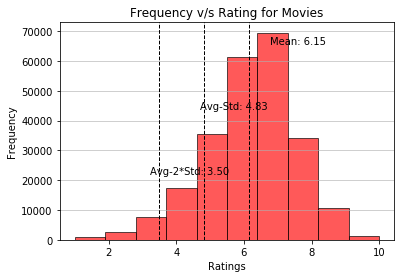

In [48]:
#In Order to determine good quality content to be recommended, the need for determining the rating occurs.
#Obtaining ratings which are greater than Mean ratings since the dataset is very large and cosine similarity can be easily applied

avg1=np.average(ratings_movie['averageRating'])
std1=np.std(ratings_movie['averageRating'])
plt.hist(ratings_movie['averageRating'],color='red',alpha=0.65,edgecolor='k')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ratings')
min_ylim, max_ylim = plt.ylim()
plt.axvline(avg1,color='k', linestyle='dashed', linewidth=1)
plt.text(avg1*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(avg1))

plt.axvline(avg1-std1,color='k', linestyle='dashed', linewidth=1)
plt.text(avg1-std1*1.1, max_ylim*0.6, 'Avg-Std: {:.2f}'.format(avg1-std1))


plt.axvline(avg1-2*std1,color='k', linestyle='dashed', linewidth=1)
plt.text(avg1-2*std1*1.1, max_ylim*0.3, 'Avg-2*Std: {:.2f}'.format(avg1-2*std1))

plt.ylabel('Frequency')
plt.title('Frequency v/s Rating for Movies')

In [49]:
#Removed tv shows and movies with less than Mean Rating so that majority of shows and movies are in the list and good quality
#content is only recommended.Tried to reduce the data as much as dataset id very large for applying cosine similarity.

ratings_movie.drop(ratings_movie[ratings_movie['averageRating'] < 6.15].index, inplace = True)
ratings_tv.drop(ratings_tv[ratings_tv['averageRating'] < 6.77].index, inplace = True)


In [50]:
ratings_movie.info(),ratings_tv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131614 entries, 9 to 240748
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          131614 non-null  object 
 1   titleType       131614 non-null  object 
 2   originalTitle   131614 non-null  object 
 3   Year            131614 non-null  object 
 4   runtimeMinutes  119856 non-null  object 
 5   genres          131614 non-null  object 
 6   averageRating   131614 non-null  float64
 7   numVotes        131614 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 9.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45342 entries, 0 to 76757
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          45342 non-null  object 
 1   titleType       45342 non-null  object 
 2   originalTitle   45342 non-null  object 
 3   startYear       45342 non-null

(None, None)

In [51]:
ratings_movie.to_csv('Ratings_movie.csv')
ratings_tv.to_csv('Ratings_tv.csv')
df2.to_csv('Director.csv')
df3.to_csv('Actors.csv')
df5.to_csv('Names.csv')

In [52]:
#Grouping all the actors in df3 by tconst
df3=df3.groupby(['tconst'], as_index = False).agg({'nconst': ','.join})

In [53]:
df3.head()

,tconst,nconst
0,tt0000005,"nm0443482,nm0653042"
1,tt0000007,"nm0179163,nm0183947"
2,tt0000008,nm0653028
3,tt0000009,"nm0063086,nm0183823,nm1309758"
4,tt0000011,nm3692297


In [54]:
#Merging ratings_tv and director dataset(df2)
df2.rename(columns={'nconst':'nconst_dir'},inplace=True)
df3.rename(columns={'ncont':'nconst_act'},inplace=True)
ratings_tv=pd.merge(ratings_tv,df2,on='tconst')


In [55]:
ratings_tv.head()

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors
0,tt0039123,tvSeries,Kraft Television Theatre,1947,1958,60,Drama,8.5,128,"nm0781751,nm0854358,nm1802165,nm0200022,nm0181..."
1,tt0040021,tvSeries,Actor's Studio,1948,1950,30,Drama,7.3,55,"nm0696296,nm0781751,nm0912998,nm0000989,nm5625137"
2,tt0040034,tvSeries,Candid Camera,1948,1952,30,"Comedy,Family,Reality-TV",7.1,119,nm0298793
3,tt0040036,tvSeries,The Chevrolet Tele-Theatre,1948,1950,30,Drama,8.4,24,"nm0240378,nm0626972,nm0232401,nm0076150,nm0801000"
4,tt0040041,tvSeries,Texaco Star Theatre Starring Milton Berle,1948,1956,60,"Comedy,Family",7.7,99,"nm0000926,nm0143653,nm0370749,nm0809967,nm0308417"


In [56]:
#merging the actors(df3) and ratings_tv
ratings_tv=pd.merge(ratings_tv,df3,on='tconst')

In [57]:
ratings_tv.head()

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,nconst
0,tt0039123,tvSeries,Kraft Television Theatre,1947,1958,60,Drama,8.5,128,"nm0781751,nm0854358,nm1802165,nm0200022,nm0181...","nm0572844,nm0853299,nm0379051,nm0181961,nm0550..."
1,tt0040021,tvSeries,Actor's Studio,1948,1950,30,Drama,7.3,55,"nm0696296,nm0781751,nm0912998,nm0000989,nm5625137","nm0384696,nm1169111,nm0358449,nm0291507,nm0838..."
2,tt0040036,tvSeries,The Chevrolet Tele-Theatre,1948,1950,30,Drama,8.4,24,"nm0240378,nm0626972,nm0232401,nm0076150,nm0801000","nm0002143,nm0452128,nm0256207,nm0176235,nm0191..."
3,tt0040041,tvSeries,Texaco Star Theatre Starring Milton Berle,1948,1956,60,"Comedy,Family",7.7,99,"nm0000926,nm0143653,nm0370749,nm0809967,nm0308417",nm0318226
4,tt0040042,tvSeries,The Morey Amsterdam Show,1948,1950,30,"Comedy,Family,Music",7.8,24,"nm0507076,nm1213560,nm0361875","nm0025440,nm0138770,nm0839797"


In [58]:
ratings_tv.rename(columns={'nconst':'actors'},inplace=True)
ratings_tv.head()

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,actors
0,tt0039123,tvSeries,Kraft Television Theatre,1947,1958,60,Drama,8.5,128,"nm0781751,nm0854358,nm1802165,nm0200022,nm0181...","nm0572844,nm0853299,nm0379051,nm0181961,nm0550..."
1,tt0040021,tvSeries,Actor's Studio,1948,1950,30,Drama,7.3,55,"nm0696296,nm0781751,nm0912998,nm0000989,nm5625137","nm0384696,nm1169111,nm0358449,nm0291507,nm0838..."
2,tt0040036,tvSeries,The Chevrolet Tele-Theatre,1948,1950,30,Drama,8.4,24,"nm0240378,nm0626972,nm0232401,nm0076150,nm0801000","nm0002143,nm0452128,nm0256207,nm0176235,nm0191..."
3,tt0040041,tvSeries,Texaco Star Theatre Starring Milton Berle,1948,1956,60,"Comedy,Family",7.7,99,"nm0000926,nm0143653,nm0370749,nm0809967,nm0308417",nm0318226
4,tt0040042,tvSeries,The Morey Amsterdam Show,1948,1950,30,"Comedy,Family,Music",7.8,24,"nm0507076,nm1213560,nm0361875","nm0025440,nm0138770,nm0839797"


In [59]:
#Merging ratings_movie and director(df2) datasets
ratings_movie=pd.merge(ratings_movie,df2,on='tconst')
ratings_movie.head()

,tconst,titleType,originalTitle,Year,runtimeMinutes,genres,averageRating,numVotes,directors
0,tt0000739,movie,El pastorcito de Torrente,1908,NaN,Drama,6.2,8,nm0191133
1,tt0001475,movie,Amor fatal,1911,NaN,"Drama,Romance",7.4,14,nm0108345
2,tt0001498,movie,The Battle of Trafalgar,1911,51,War,7.7,6,nm0205986
3,tt0002130,movie,L'Inferno,1911,71,"Adventure,Drama,Fantasy",7.0,2207,"nm0078205,nm0655824,nm0209738"
4,tt0002186,movie,Den flyvende cirkus,1912,46,Drama,6.3,87,nm0511155


In [60]:
#Merging ratings_tv and actors(df3) datasets
ratings_movie=pd.merge(ratings_movie,df3,on='tconst')
ratings_movie.head()

,tconst,titleType,originalTitle,Year,runtimeMinutes,genres,averageRating,numVotes,directors,nconst
0,tt0001475,movie,Amor fatal,1911,NaN,"Drama,Romance",7.4,14,nm0108345,"nm0836458,nm1616439,nm1617025,nm1714653"
1,tt0001498,movie,The Battle of Trafalgar,1911,51,War,7.7,6,nm0205986,"nm0095809,nm0697944,nm0330280,nm0644728,nm0768..."
2,tt0002130,movie,L'Inferno,1911,71,"Adventure,Drama,Fantasy",7.0,2207,"nm0078205,nm0655824,nm0209738","nm0660139,nm0685283,nm0209738,nm3942815"
3,tt0002186,movie,Den flyvende cirkus,1912,46,Drama,6.3,87,nm0511155,"nm0517327,nm0653174,nm0653149,nm0064949,nm1925..."
4,tt0002423,movie,Madame DuBarry,1919,85,"Biography,Drama,Romance",6.8,744,nm0523932,"nm0624470,nm0417837,nm0509573,nm0903235"


In [61]:
ratings_movie.rename(columns={'nconst':'Actors'},inplace=True)
ratings_movie.head()

,tconst,titleType,originalTitle,Year,runtimeMinutes,genres,averageRating,numVotes,directors,Actors
0,tt0001475,movie,Amor fatal,1911,NaN,"Drama,Romance",7.4,14,nm0108345,"nm0836458,nm1616439,nm1617025,nm1714653"
1,tt0001498,movie,The Battle of Trafalgar,1911,51,War,7.7,6,nm0205986,"nm0095809,nm0697944,nm0330280,nm0644728,nm0768..."
2,tt0002130,movie,L'Inferno,1911,71,"Adventure,Drama,Fantasy",7.0,2207,"nm0078205,nm0655824,nm0209738","nm0660139,nm0685283,nm0209738,nm3942815"
3,tt0002186,movie,Den flyvende cirkus,1912,46,Drama,6.3,87,nm0511155,"nm0517327,nm0653174,nm0653149,nm0064949,nm1925..."
4,tt0002423,movie,Madame DuBarry,1919,85,"Biography,Drama,Romance",6.8,744,nm0523932,"nm0624470,nm0417837,nm0509573,nm0903235"


In [62]:
df5[df5['nconst']=='nm0063086']

,nconst,primaryName,knownForTitles,primaryProfession
60297,nm0063086,Blanche Bayliss,tt0000009,actress


In [63]:
ratings_tv.to_csv('Final_TV.csv')
ratings_movie.to_csv('Final_Movie.csv')

In [64]:
ratings_movie

,tconst,titleType,originalTitle,Year,runtimeMinutes,genres,averageRating,numVotes,directors,Actors
0,tt0001475,movie,Amor fatal,1911,NaN,"Drama,Romance",7.4,14,nm0108345,"nm0836458,nm1616439,nm1617025,nm1714653"
1,tt0001498,movie,The Battle of Trafalgar,1911,51,War,7.7,6,nm0205986,"nm0095809,nm0697944,nm0330280,nm0644728,nm0768..."
2,tt0002130,movie,L'Inferno,1911,71,"Adventure,Drama,Fantasy",7.0,2207,"nm0078205,nm0655824,nm0209738","nm0660139,nm0685283,nm0209738,nm3942815"
3,tt0002186,movie,Den flyvende cirkus,1912,46,Drama,6.3,87,nm0511155,"nm0517327,nm0653174,nm0653149,nm0064949,nm1925..."
4,tt0002423,movie,Madame DuBarry,1919,85,"Biography,Drama,Romance",6.8,744,nm0523932,"nm0624470,nm0417837,nm0509573,nm0903235"
...,...,...,...,...,...,...,...,...,...,...
107265,tt9913936,movie,Paradise,2019,135,"Crime,Drama",8.2,18,nm10091596,"nm10091596,nm7467399,nm10536936,nm10536938"
107266,tt9914286,movie,Sokagin Çocuklari,2019,98,"Drama,Family",6.4,194,nm4394529,"nm4394529,nm7659571,nm2456249,nm10569025"
107267,tt9914942,movie,La vida sense la Sara Amat,2019,74,Drama,6.8,97,nm1716653,"nm10814833,nm10823679,nm1290838,nm5580678"
107268,tt9915790,movie,Bobbyr Bondhura,2019,NaN,Family,7.3,19,nm10538030,"nm1387306,nm2756056,nm10538031,nm3056725,nm191..."


In [65]:
ratings_tv

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,actors
0,tt0039123,tvSeries,Kraft Television Theatre,1947,1958,60,Drama,8.5,128,"nm0781751,nm0854358,nm1802165,nm0200022,nm0181...","nm0572844,nm0853299,nm0379051,nm0181961,nm0550..."
1,tt0040021,tvSeries,Actor's Studio,1948,1950,30,Drama,7.3,55,"nm0696296,nm0781751,nm0912998,nm0000989,nm5625137","nm0384696,nm1169111,nm0358449,nm0291507,nm0838..."
2,tt0040036,tvSeries,The Chevrolet Tele-Theatre,1948,1950,30,Drama,8.4,24,"nm0240378,nm0626972,nm0232401,nm0076150,nm0801000","nm0002143,nm0452128,nm0256207,nm0176235,nm0191..."
3,tt0040041,tvSeries,Texaco Star Theatre Starring Milton Berle,1948,1956,60,"Comedy,Family",7.7,99,"nm0000926,nm0143653,nm0370749,nm0809967,nm0308417",nm0318226
4,tt0040042,tvSeries,The Morey Amsterdam Show,1948,1950,30,"Comedy,Family,Music",7.8,24,"nm0507076,nm1213560,nm0361875","nm0025440,nm0138770,nm0839797"
...,...,...,...,...,...,...,...,...,...,...,...
32984,tt9906284,tvSeries,Patrulha da Noite,2019,NaN,NaN,Comedy,7.4,17,nm1991549,"nm1311809,nm1501292,nm2109003,nm4634429,nm1433..."
32985,tt9909248,tvSeries,Race Across the World,2019,NaN,59,"Documentary,Game-Show",8.3,349,"nm3359106,nm5308046,nm8633893,nm3205217,nm4501...","nm11551632,nm11551612,nm11551633,nm11551611,nm..."
32986,tt9910292,tvMiniSeries,Facebook Idióták,2016,NaN,NaN,Comedy,7.4,5,nm7929295,nm7929295
32987,tt9915144,tvSeries,Never Ever,2018,NaN,NaN,"Biography,Documentary,History",8.8,39,nm9939361,nm9939361
